In [16]:
from physics.hstar import gghzz, c6
from physics.hzz import angles, zpair
from physics.simulation import msq

import numpy as np
import matplotlib.pyplot as plt

In [17]:
SAMPLE_DIR = '..'

In [18]:
sample_lsq = gghzz.Process(  
    (1.4783394, SAMPLE_DIR + '/ggZZ2e2m_all_new.csv', 500000),
    (0.47412769, SAMPLE_DIR + '/ggZZ4e_all_new.csv', 500000),
    (0.47412769, SAMPLE_DIR + '/ggZZ4m_all_new.csv', 500000)
)
sample_cls = gghzz.Process(  
    (1.4783394, SAMPLE_DIR + '/ggZZ2e2m_all_new.csv', 500000),
    (0.47412769, SAMPLE_DIR + '/ggZZ4e_all_new.csv', 500000),
    (0.47412769, SAMPLE_DIR + '/ggZZ4m_all_new.csv', 500000)
)
sample_truth = gghzz.Process(  
    (1.4783394, SAMPLE_DIR + '/ggZZ2e2m_all_new.csv', 500000),
    (0.47412769, SAMPLE_DIR + '/ggZZ4e_all_new.csv', 500000),
    (0.47412769, SAMPLE_DIR + '/ggZZ4m_all_new.csv', 500000)
)

In [19]:
m4l_filter = angles.M4lFilter(m4l_min=250)
sample_lsq.events.filter(m4l_filter)
sample_cls.events.filter(m4l_filter)
sample_truth.events.filter(m4l_filter)

In [20]:
z_chooser_lsq = zpair.ZPairChooser(algorithm='leastsquare')
l1_1, l2_1, l1_2, l2_2 = sample_lsq.events.filter(z_chooser_lsq)

kinematics_lsq = angles.calculate(l1_1, l2_1, l1_2, l2_2)

[    0     1     2 ... 40779 40780 40781]
[    0     1     2 ... 40779 40780 40781]


In [21]:
z_chooser_cls = zpair.ZPairChooser(algorithm='closest')
l1_1, l2_1, l1_2, l2_2 = sample_cls.events.filter(z_chooser_cls)

kinematics_cls = angles.calculate(l1_1, l2_1, l1_2, l2_2)

[    0     1     2 ... 40779 40780 40781]
[    0     1     2 ... 40779 40780 40781]


In [22]:
z_chooser_truth = zpair.ZPairChooser(algorithm='truth')
l1_1, l2_1, l1_2, l2_2 = sample_truth.events.filter(z_chooser_truth)

kinematics_truth = angles.calculate(l1_1, l2_1, l1_2, l2_2)

[    0     1     2 ... 40779 40780 40781]
[    0     1     2 ... 40779 40780 40781]


(40782,) (40782,)


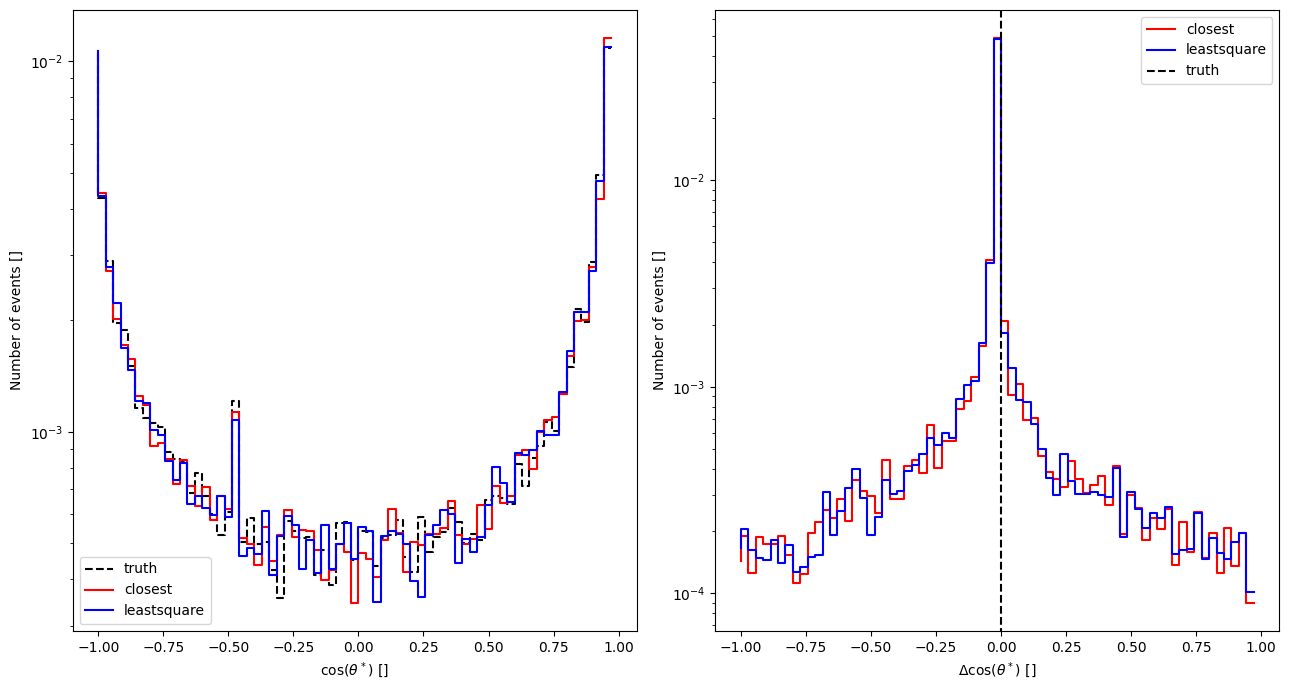

In [23]:
cth_str_lsq = kinematics_lsq[:,0]
cth_str_cls = kinematics_cls[:,0]
cth_str_truth = kinematics_truth[:,0]

BINS=70

print(cth_str_lsq.shape, sample_lsq[msq.Component.SIG].weights.shape)

hist_lsq, bins = np.histogram(cth_str_lsq, bins=BINS, range=(-1,1), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(cth_str_cls, bins=BINS, range=(-1,1), weights=sample_cls[msq.Component.SIG].weights)
hist_truth, bins = np.histogram(cth_str_truth, bins=BINS, range=(-1,1), weights=sample_truth[msq.Component.SIG].weights)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,7))

ax1.step(bins[:-1], hist_truth, color='k', linestyle='--', label=u'truth')
ax1.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax1.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax1.set_xlabel(u'$\mathrm{cos}(\\theta^*)$ []')
ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

hist_lsq, bins = np.histogram(cth_str_lsq-cth_str_truth, bins=BINS, range=(-1,1), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(cth_str_cls-cth_str_truth, bins=BINS, range=(-1,1), weights=sample_cls[msq.Component.SIG].weights)

ax2.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax2.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax2.set_xlabel(u'$\Delta\mathrm{cos}(\\theta^*)$ []')
ax2.set_ylabel(u'Number of events []')
ax2.set_yscale('log')
#ax2.set_ybound(0.99,1.02)

ax2.vlines(0.0, ymin=0.0, ymax=1.0, color='k', linestyles='--', label='truth')

ax2.legend()

fig.tight_layout()

plt.show()

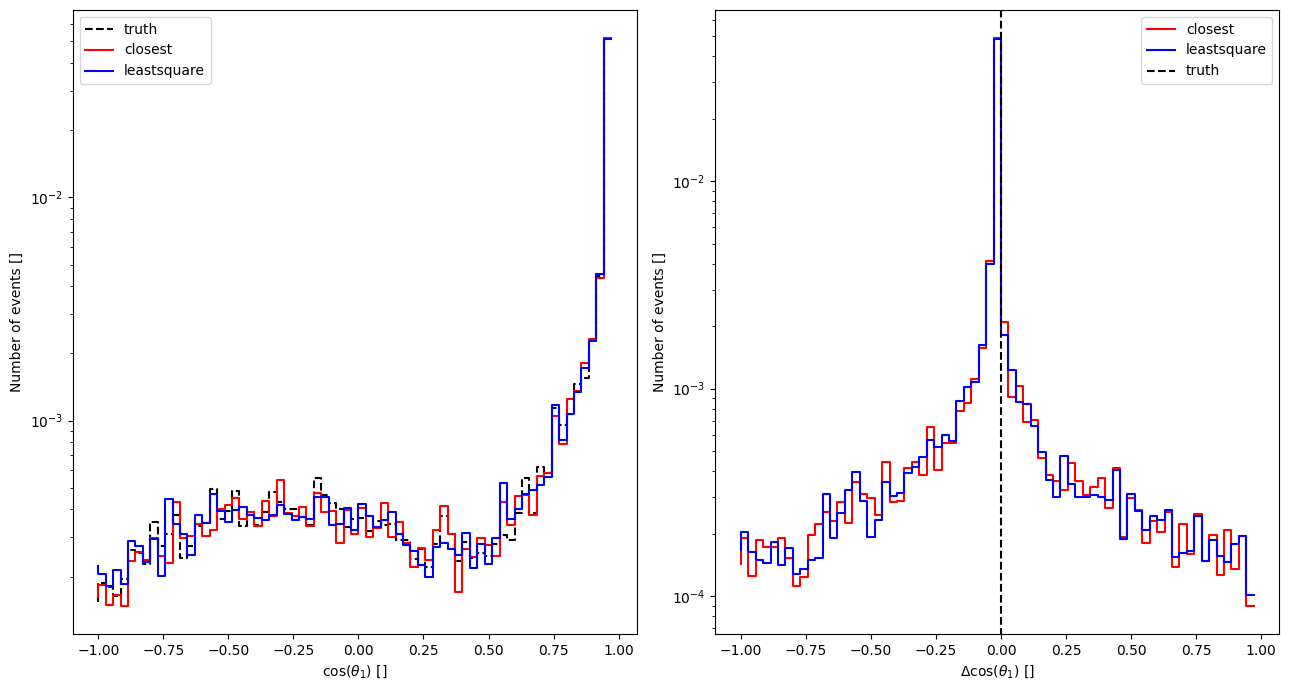

In [24]:
cth1_lsq = kinematics_lsq[:,1]
cth1_cls = kinematics_cls[:,1]
cth1_truth = kinematics_truth[:,1]

BINS=70

hist_lsq, bins = np.histogram(cth1_lsq, bins=BINS, range=(-1,1), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(cth1_cls, bins=BINS, range=(-1,1), weights=sample_cls[msq.Component.SIG].weights)
hist_truth, bins = np.histogram(cth1_truth, bins=BINS, range=(-1,1), weights=sample_truth[msq.Component.SIG].weights)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,7))

ax1.step(bins[:-1], hist_truth, color='k', linestyle='--', label=u'truth')
ax1.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax1.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax1.set_xlabel(u'$\mathrm{cos}(\\theta_1)$ []')
ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

hist_lsq, bins = np.histogram(cth_str_lsq-cth_str_truth, bins=BINS, range=(-1,1), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(cth_str_cls-cth_str_truth, bins=BINS, range=(-1,1), weights=sample_cls[msq.Component.SIG].weights)

ax2.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax2.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax2.set_xlabel(u'$\Delta\mathrm{cos}(\\theta_1)$ []')
ax2.set_ylabel(u'Number of events []')
ax2.set_yscale('log')
#ax2.set_ybound(0.99,1.02)

ax2.vlines(0.0, ymin=0.0, ymax=1.0, color='k', linestyles='--', label='truth')

ax2.legend()

fig.tight_layout()

plt.show()

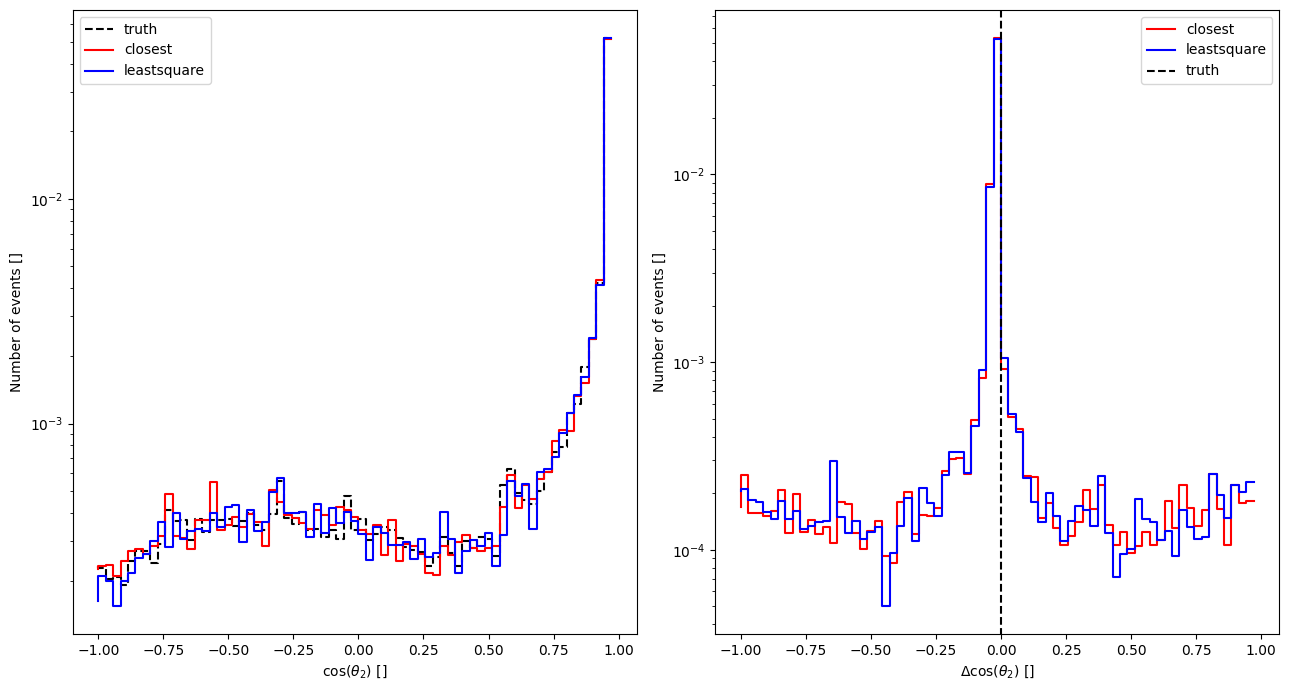

In [25]:
cth2_lsq = kinematics_lsq[:,2]
cth2_cls = kinematics_cls[:,2]
cth2_truth = kinematics_truth[:,2]

BINS=70

hist_lsq, bins = np.histogram(cth2_lsq, bins=BINS, range=(-1,1), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(cth2_cls, bins=BINS, range=(-1,1), weights=sample_cls[msq.Component.SIG].weights)
hist_truth, bins = np.histogram(cth2_truth, bins=BINS, range=(-1,1), weights=sample_truth[msq.Component.SIG].weights)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,7))

ax1.step(bins[:-1], hist_truth, color='k', linestyle='--', label=u'truth')
ax1.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax1.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax1.set_xlabel(u'$\mathrm{cos}(\\theta_2)$ []')
ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

hist_lsq, bins = np.histogram(cth2_lsq-cth2_truth, bins=BINS, range=(-1,1), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(cth2_cls-cth2_truth, bins=BINS, range=(-1,1), weights=sample_cls[msq.Component.SIG].weights)

ax2.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax2.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax2.set_xlabel(u'$\Delta\mathrm{cos}(\\theta_2)$ []')
ax2.set_ylabel(u'Number of events []')
ax2.set_yscale('log')
#ax2.set_ybound(0.99,1.02)

ax2.vlines(0.0, ymin=0.0, ymax=1.0, color='k', linestyles='--', label='truth')

ax2.legend()

fig.tight_layout()

plt.show()

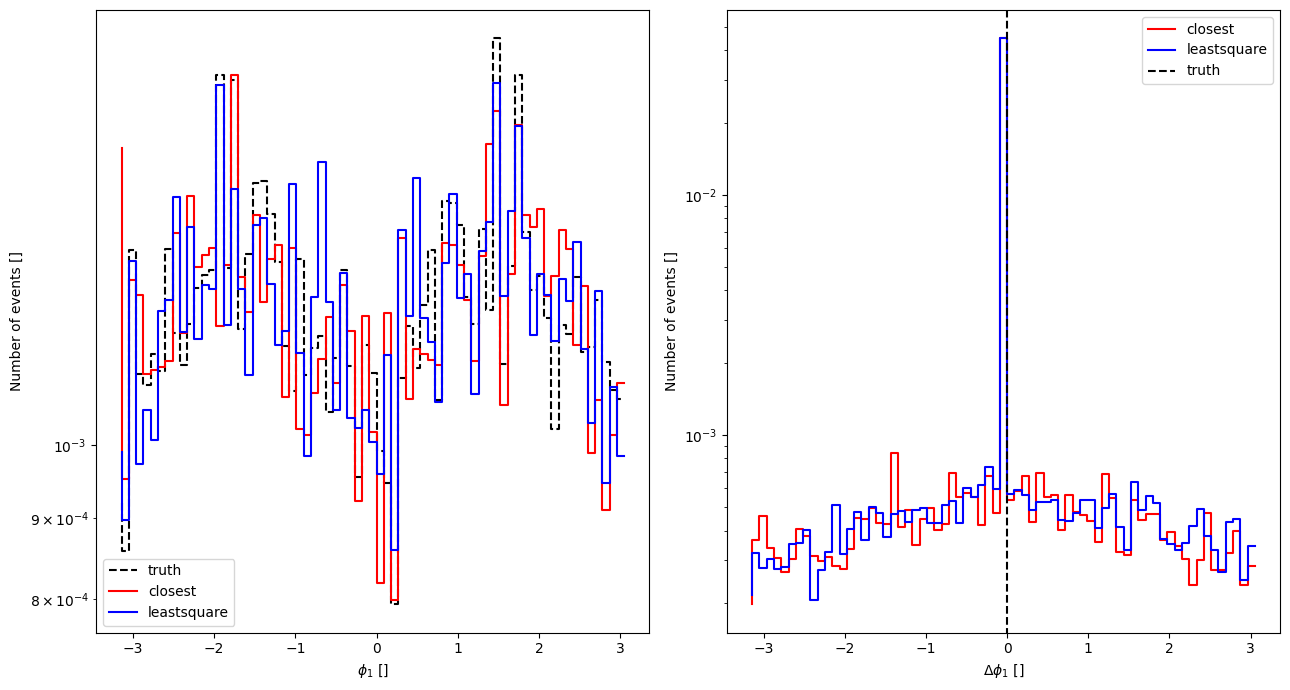

In [26]:
phi1_lsq = kinematics_lsq[:,3]
phi1_cls = kinematics_cls[:,3]
phi1_truth = kinematics_truth[:,3]

BINS=70

hist_lsq, bins = np.histogram(phi1_lsq, bins=BINS, range=(-np.pi,np.pi), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(phi1_cls, bins=BINS, range=(-np.pi,np.pi), weights=sample_cls[msq.Component.SIG].weights)
hist_truth, bins = np.histogram(phi1_truth, bins=BINS, range=(-np.pi,np.pi), weights=sample_truth[msq.Component.SIG].weights)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,7))

ax1.step(bins[:-1], hist_truth, color='k', linestyle='--', label=u'truth')
ax1.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax1.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax1.set_xlabel(u'$\phi_1$ []')
ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

hist_lsq, bins = np.histogram(phi1_lsq-phi1_truth, bins=BINS, range=(-np.pi,np.pi), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(phi1_cls-phi1_truth, bins=BINS, range=(-np.pi,np.pi), weights=sample_cls[msq.Component.SIG].weights)

ax2.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax2.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax2.set_xlabel(u'$\Delta\phi_1$ []')
ax2.set_ylabel(u'Number of events []')
ax2.set_yscale('log')
#ax2.set_ybound(0.99,1.02)

ax2.vlines(0.0, ymin=0.0, ymax=1.0, color='k', linestyles='--', label='truth')

ax2.legend()

fig.tight_layout()

plt.show()

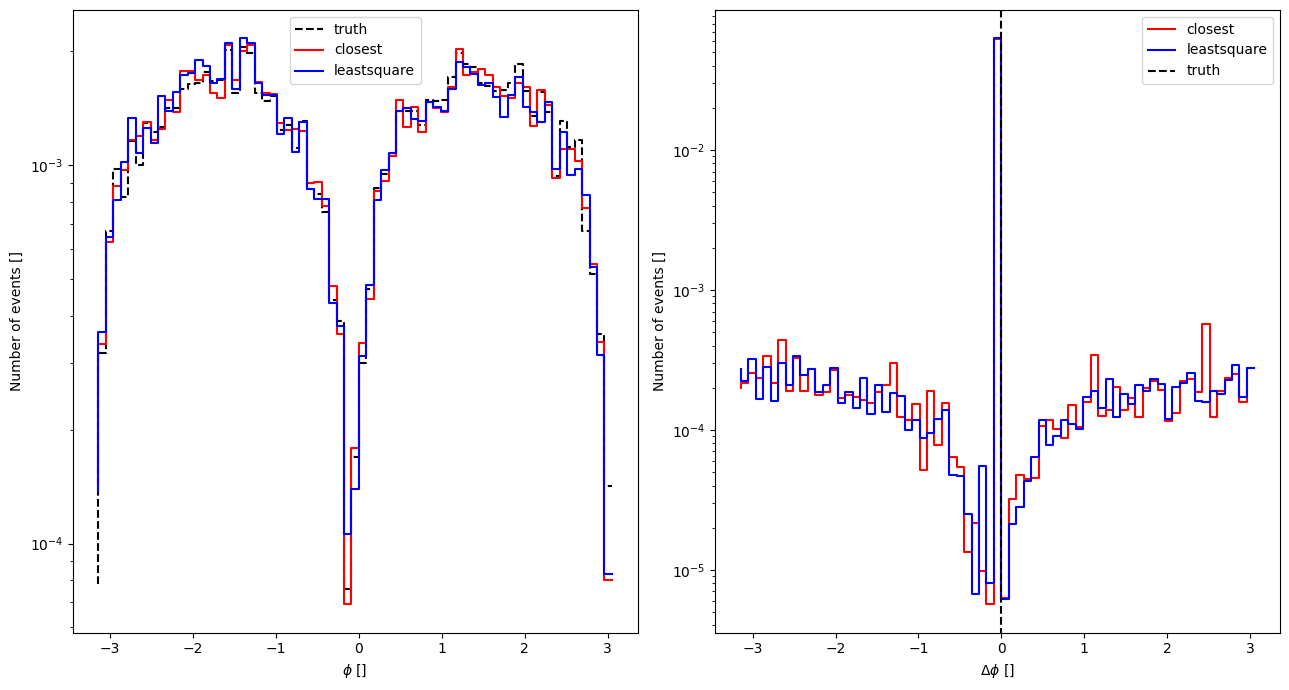

In [27]:
phi_lsq = kinematics_lsq[:,4]
phi_cls = kinematics_cls[:,4]
phi_truth = kinematics_truth[:,4]

BINS=70

hist_lsq, bins = np.histogram(phi_lsq, bins=BINS, range=(-np.pi,np.pi), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(phi_cls, bins=BINS, range=(-np.pi,np.pi), weights=sample_cls[msq.Component.SIG].weights)
hist_truth, bins = np.histogram(phi_truth, bins=BINS, range=(-np.pi,np.pi), weights=sample_truth[msq.Component.SIG].weights)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,7))

ax1.step(bins[:-1], hist_truth, color='k', linestyle='--', label=u'truth')
ax1.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax1.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax1.set_xlabel(u'$\phi$ []')
ax1.set_ylabel('Number of events []')
ax1.set_yscale('log')

ax1.legend()

hist_lsq, bins = np.histogram(phi_lsq-phi_truth, bins=BINS, range=(-np.pi,np.pi), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(phi_cls-phi_truth, bins=BINS, range=(-np.pi,np.pi), weights=sample_cls[msq.Component.SIG].weights)

ax2.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax2.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax2.set_xlabel(u'$\Delta\phi$ []')
ax2.set_ylabel(u'Number of events []')
ax2.set_yscale('log')
#ax2.set_ybound(0.99,1.02)

ax2.vlines(0.0, ymin=0.0, ymax=1.0, color='k', linestyles='--', label='truth')

ax2.legend()

fig.tight_layout()

plt.show()

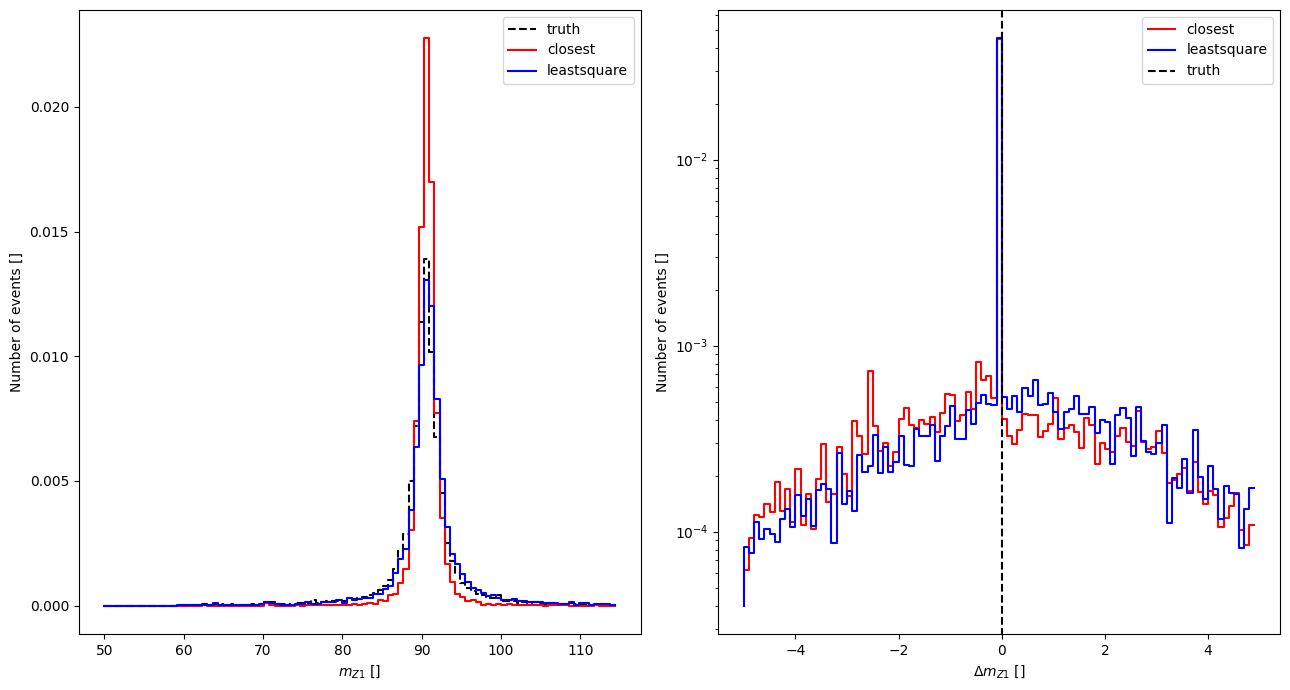

In [28]:
mZ1_lsq = kinematics_lsq[:,5]
mZ1_cls = kinematics_cls[:,5]
mZ1_truth = kinematics_truth[:,5]

BINS=100

hist_lsq, bins = np.histogram(mZ1_lsq, bins=BINS, range=(50,115), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(mZ1_cls, bins=BINS, range=(50,115), weights=sample_cls[msq.Component.SIG].weights)
hist_truth, bins = np.histogram(mZ1_truth, bins=BINS, range=(50,115), weights=sample_truth[msq.Component.SIG].weights)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,7))

ax1.step(bins[:-1], hist_truth, color='k', linestyle='--', label=u'truth')
ax1.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax1.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax1.set_xlabel(u'$m_{Z1}$ []')
ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

hist_lsq, bins = np.histogram(mZ1_lsq-mZ1_truth, bins=BINS, range=(-5,5), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(mZ1_cls-mZ1_truth, bins=BINS, range=(-5,5), weights=sample_cls[msq.Component.SIG].weights)

ax2.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax2.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax2.set_xlabel(u'$\Delta m_{Z1}$ []')
ax2.set_ylabel(u'Number of events []')
ax2.set_yscale('log')
#ax2.set_ybound(0.99,1.02)

ax2.vlines(0.0, ymin=0.0, ymax=1.0, color='k', linestyles='--', label='truth')

ax2.legend()

fig.tight_layout()

plt.show()

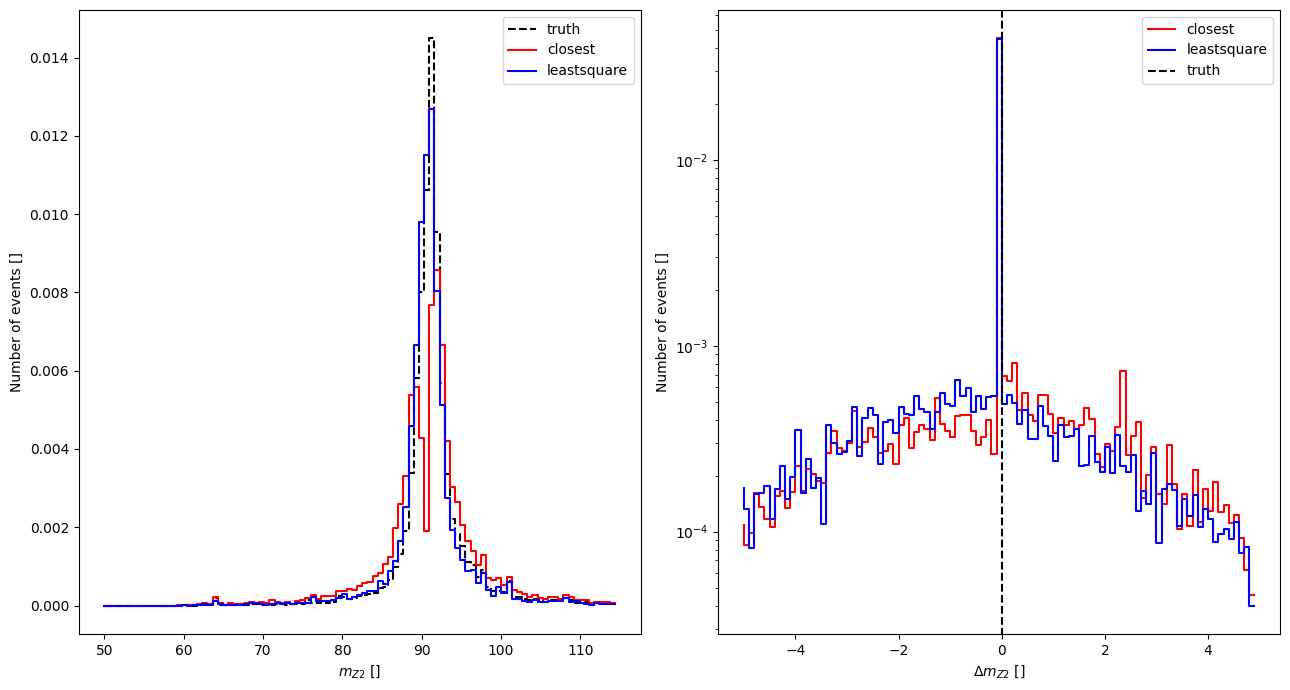

In [29]:
mZ2_lsq = kinematics_lsq[:,6]
mZ2_cls = kinematics_cls[:,6]
mZ2_truth = kinematics_truth[:,6]

BINS=100

hist_lsq, bins = np.histogram(mZ2_lsq, bins=BINS, range=(50,115), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(mZ2_cls, bins=BINS, range=(50,115), weights=sample_cls[msq.Component.SIG].weights)
hist_truth, bins = np.histogram(mZ2_truth, bins=BINS, range=(50,115), weights=sample_truth[msq.Component.SIG].weights)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,7))

ax1.step(bins[:-1], hist_truth, color='k', linestyle='--', label=u'truth')
ax1.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax1.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax1.set_xlabel(u'$m_{Z2}$ []')
ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

hist_lsq, bins = np.histogram(mZ2_lsq-mZ2_truth, bins=BINS, range=(-5,5), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(mZ2_cls-mZ2_truth, bins=BINS, range=(-5,5), weights=sample_cls[msq.Component.SIG].weights)

ax2.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax2.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax2.set_xlabel(u'$\Delta m_{Z2}$ []')
ax2.set_ylabel(u'Number of events []')
ax2.set_yscale('log')
#ax2.set_ybound(0.99,1.02)

ax2.vlines(0.0, ymin=0.0, ymax=1.0, color='k', linestyles='--', label='truth')

ax2.legend()

fig.tight_layout()

plt.show()

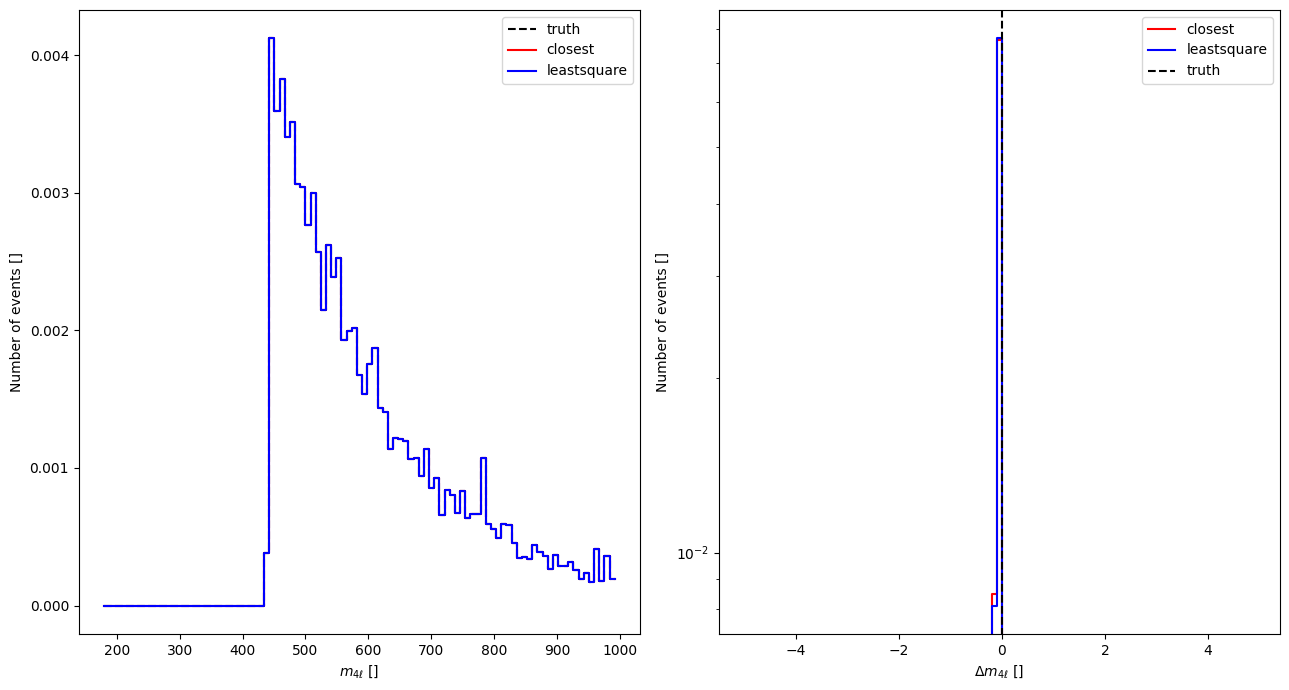

In [30]:
m4l_lsq = kinematics_lsq[:,7]
m4l_cls = kinematics_cls[:,7]
m4l_truth = kinematics_truth[:,7]

BINS=100

hist_lsq, bins = np.histogram(m4l_lsq, bins=BINS, range=(180,1000), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(m4l_cls, bins=BINS, range=(180,1000), weights=sample_cls[msq.Component.SIG].weights)
hist_truth, bins = np.histogram(m4l_truth, bins=BINS, range=(180,1000), weights=sample_truth[msq.Component.SIG].weights)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,7))

ax1.step(bins[:-1], hist_truth, color='k', linestyle='--', label=u'truth')
ax1.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax1.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax1.set_xlabel(u'$m_{4\ell}$ []')
ax1.set_ylabel('Number of events []')
#ax1.set_yscale('log')

ax1.legend()

hist_lsq, bins = np.histogram(m4l_lsq-m4l_truth, bins=BINS, range=(-5,5), weights=sample_lsq[msq.Component.SIG].weights)
hist_cls, bins = np.histogram(m4l_cls-m4l_truth, bins=BINS, range=(-5,5), weights=sample_cls[msq.Component.SIG].weights)

ax2.step(bins[:-1], hist_cls, color='r', label=u'closest')
ax2.step(bins[:-1], hist_lsq, color='b', label=u'leastsquare')

ax2.set_xlabel(u'$\Delta m_{4\ell}$ []')
ax2.set_ylabel(u'Number of events []')
ax2.set_yscale('log')
#ax2.set_ybound(0.99,1.02)

ax2.vlines(0.0, ymin=0.0, ymax=1.0, color='k', linestyles='--', label='truth')

ax2.legend()

fig.tight_layout()

plt.show()